In [18]:
import numpy as np
import pandas as pd

# Import the datasets
apple_term_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Term_reduced.csv')
apple_2gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Bigram_reduced.csv')
apple_3gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Trigram_reduced.csv')
apple_4gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-4-gram_reduced.csv')


In [19]:
# Term training data and labels
X_train_term = apple_term_training.iloc[:, :-1].values
y_train_term = apple_term_training.iloc[:, -1].values

# Bigram training data and labels
X_train_2gram = apple_2gram_training.iloc[:, :-1].values
y_train_2gram = apple_2gram_training.iloc[:, -1].values

# 3gram training data and labels
X_train_3gram = apple_3gram_training.iloc[:, :-1].values
y_train_3gram = apple_3gram_training.iloc[:, -1].values

# 4gram training data and labels
X_train_4gram = apple_4gram_training.iloc[:, :-1].values
y_train_4gram = apple_4gram_training.iloc[:, -1].values

Term - Average accuracy: 0.688 (+- 0.018)

Classification Report (Term):
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      3650
           1       0.60      0.58      0.59      3370

    accuracy                           0.62      7020
   macro avg       0.61      0.61      0.61      7020
weighted avg       0.61      0.62      0.61      7020

Bigram - Average accuracy: 0.671 (+- 0.016)

Classification Report (Bigram):
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      3650
           1       0.59      0.59      0.59      3370

    accuracy                           0.60      7020
   macro avg       0.60      0.60      0.60      7020
weighted avg       0.60      0.60      0.60      7020

Trigram - Average accuracy: 0.633 (+- 0.023)

Classification Report (Trigram):
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      3650
        

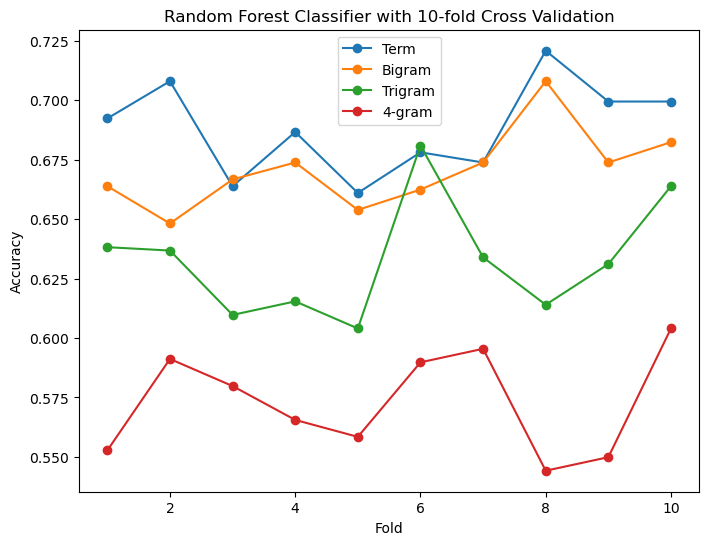

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

def train_best_rf_model(n_gram, X_train, y_train, ax):
    param_dist = {
        'n_estimators': sp_randint(50, 200),
        'max_depth': [None] + list(sp_randint(5, 30).rvs(size=5)),
        'max_features': ['sqrt', 'log2', None],
        'criterion': ['gini', 'entropy'],
        'class_weight': [None, 'balanced', 'balanced_subsample']
    }
    
    clf = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    
    best_rf_model = RandomForestClassifier(**best_params, random_state=42)
    scores = cross_val_score(best_rf_model, X_train, y_train, scoring='accuracy', cv=cv)
    print(f'{n_gram} - Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
    
    y_pred = cross_val_predict(best_rf_model, X_train, y_train, cv=k)
    report = classification_report(y_train, y_pred)
    print(f"\nClassification Report ({n_gram}):")
    print(report)
    
    ax.plot(range(1, k+1), scores, '-o', label=n_gram)

k = 10
cv = KFold(n_splits=k, random_state=0, shuffle=True)
fig, ax = plt.subplots(figsize=(8, 6))

n_grams = ['Term', 'Bigram', 'Trigram', '4-gram']
X_train_list = [X_train_term, X_train_2gram, X_train_3gram, X_train_4gram]
y_train_list = [y_train_term, y_train_2gram, y_train_3gram, y_train_4gram]

for n_gram, X_train, y_train in zip(n_grams, X_train_list, y_train_list):
    train_best_rf_model(n_gram, X_train, y_train, ax)

ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title(f'Random Forest Classifier with {k}-fold Cross Validation')
ax.legend()
plt.show()


n_estimators = number of tress in the forest 

max_features = max number of features considering for splitting a node 

max_depth = max number of levels in each decision tree 

min_samples_split = min number of data points placed in a node is split 

min_samples_leaf = min number of data points allowed in a leaf node 

bootstrap = method for sampling data points (with or without replacement)